In [1]:
#How to hashtag alt på en gang:  alt + shift marker alt men kun ude i siden - slip! og så lav hashtag
# marker et ord - command + D så kan man rette i alle ord samtidig

#hallo emilie prøv lige at udvælge features for du optimerer hyperparameters

import h5py
import pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
import shap


from sklearn import metrics
import lightgbm as ltb
import warnings
warnings.filterwarnings("ignore")

/Users/emilieelisabethmilannielsen/anaconda3/envs/appmachine/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/emilieelisabethmilannielsen/anaconda3/envs/appmachine/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-beh

In [2]:
def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        filename = name.split('/')[1]
        return pandas.DataFrame(f[filename][:], dtype=np.float64)

train = load_data('data/train')
test  = load_data('data/test')

print (f'Shape of training data set: {train.shape}')
print (f'Shape of test data set: {test.shape}')

Shape of training data set: (162500, 166)
Shape of test data set: (160651, 164)


In [3]:
all_variables = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu', 'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0', 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster', 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2', 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3', 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits', 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG', 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG', 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0', 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3', 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core', 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG', 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG', 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset', 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection', 'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 'p_ehad1', 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3', 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]

X = train[all_variables]
y = train['Truth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#X_train_cut = X_train[:5000]
#X_test_cut = X_test[:5000]
#y_train_cut = y_train[:5000]
#y_test_cut = y_test[:5000]

X_train_cut = X_train
X_test_cut = X_test
y_train_cut = y_train
y_test_cut = y_test

# Reset the index of y_test_cut
#y_test_cut = y_test_cut.reset_index(drop=True)

In [4]:
model = ltb.LGBMClassifier()
model.fit(X_train_cut, y_train_cut)
expected_y  = y_test
predicted_y = model.predict(X_test)

print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

         0.0       0.92      0.85      0.88     10142
         1.0       0.95      0.98      0.96     30483

    accuracy                           0.94     40625
   macro avg       0.94      0.91      0.92     40625
weighted avg       0.94      0.94      0.94     40625

[[ 8585  1557]
 [  725 29758]]


In [5]:
print(f"Train accuracy: {accuracy_score(predicted_y, expected_y)*100.0:.2f}%")

Train accuracy: 94.38%


In [7]:
model.booster_.feature_importance()

array([ 14,   0,   0,   0,   0,   0,  28,  72,  50,   6,   6,   3,  46,
        15, 107, 138, 110,  79,  85,  14,   2,   8,   9,   0,   0,   4,
         4,  11,   4,   6,   1,   1,   0,   0,   7,   0,   0,   3,  23,
        16,   4,  14,  13,   2,  22, 103, 108,  40,   5,   5,  58,  25,
       155, 164,  64,   7,  40,  56,  53,   6,   6,  12,  12,   0,   2,
        11,   4,   0,   0,   9,   0,  21,  19,   0,   9,   1,   0,   0,
        63,   1,   1,   9,  14,  11,  25,   8,   6,   9,  66,  20,  73,
         5,  12,   7,   4,  11,   1,   1,  10,   9,   8,   0,  53,  18,
        12,  19,   7,   0,  12,  15,  13,   6,   0,   0,   0,  21,   0,
         1,  20,   0,   0,   3,   0,   0,   7,   3,   7,   7,   0, 141,
        21,   0,  11,  12,   6,  14,   0,  21,   6,   0,   2,  21,  22,
        11,  25,  32,   8,  19,   4,   6,   0,   3,   2,  15,   0,   5,
        20,  50,   1,   2], dtype=int32)

In [14]:
# Importance of each attribute
fea_imp_ = pd.DataFrame({'cols':X.columns, 'fea_imp':model.feature_importances_})
chosen_variables = list(fea_imp_.loc[fea_imp_.fea_imp > 0].sort_values(by=['fea_imp'], ascending = False).iloc[:15]['cols'])


In [38]:
X = train[chosen_variables]
y = train['Truth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train_cut = X_train
X_test_cut = X_test
y_train_cut = y_train
y_test_cut = y_test
print(chosen_variables)

['p_deltaPhiRescaled2', 'p_deltaEta1', 'p_ptconecoreTrackPtrCorrection', 'p_sigmad0', 'p_d0Sig', 'p_Rphi', 'p_d0', 'p_Reta', 'p_dPOverP', 'p_EptRatio', 'p_deltaPhiFromLastMeasurement', 'p_nTracks', 'p_deltaPhi2', 'p_TRTPID', 'p_ambiguityType']


In [16]:
model_fea = ltb.LGBMClassifier()
model_fea.fit(X_train_cut, y_train_cut)
expected_y  = y_test
predicted_y = model_fea.predict(X_test)

print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

         0.0       0.90      0.83      0.86     10142
         1.0       0.94      0.97      0.96     30483

    accuracy                           0.93     40625
   macro avg       0.92      0.90      0.91     40625
weighted avg       0.93      0.93      0.93     40625

[[ 8414  1728]
 [  936 29547]]


In [17]:
print(f"Train accuracy: {accuracy_score(predicted_y, expected_y)*100.0:.2f}%")

Train accuracy: 93.44%


In [44]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

def DecisionTree_CrossValidation(max_depth, num_leaves, learning_rate, n_estimators, min_split_gain, data, targets):
    """Decision Tree cross validation.
       Fits a Decision Tree with the given paramaters to the target 
       given data, calculated a CV accuracy score and returns the mean.
       The goal is to find combinations of max_depth, min_samples_leaf 
       that maximize the accuracy
    """
    
    estimator = ltb.LGBMClassifier(max_depth=max_depth, random_state=42, num_leaves=num_leaves, learning_rate=learning_rate, n_estimators=n_estimators, min_split_gain=min_split_gain)
    
    cval = cross_val_score(estimator, data, targets, scoring='accuracy', cv=5)
    
    return cval.mean()

In [45]:
def optimize_DecisionTree(data, targets, pars, n_iter=50):
    """Apply Bayesian Optimization to Decision Tree parameters."""
    
    def crossval_wrapper(max_depth, num_leaves, learning_rate, n_estimators, min_split_gain):
        """Wrapper of Decision Tree cross validation. 
           Notice how we ensure max_depth, min_samples_leaf 
           are casted to integer before we pass them along.
        """
        return DecisionTree_CrossValidation(max_depth=int(max_depth), 
                                            num_leaves=int(num_leaves),
                                            learning_rate=learning_rate, 
                                            n_estimators = int(n_estimators), 
                                            min_split_gain=min_split_gain,
                                            data=data, 
                                            targets=targets)

    optimizer = BayesianOptimization(f=crossval_wrapper, 
                                     pbounds=pars, 
                                     random_state=42, 
                                     verbose=2)
    optimizer.maximize(init_points=4, n_iter=n_iter)

    return optimizer


In [48]:

def run_bayesian_opt_lightgbm(x, y, num_leaves_range, max_depth_range, learning_rate_range, n_estimators_range, min_split_gain_range, iters=10):

    parameters_BayesianOptimization = {"num_leaves": num_leaves_range, 
                                    "max_depth": max_depth_range, 
                                    "learning_rate": learning_rate_range, 
                                    "n_estimators": n_estimators_range,
                                    "min_split_gain": min_split_gain_range
                                    }

    BayesianOptimization = optimize_DecisionTree(x, 
                                                y, 
                                                parameters_BayesianOptimization, 
                                                n_iter=iters)
    print(BayesianOptimization.max)
    dict = BayesianOptimization.max['params']
    dict['max_depth'] = int(round(dict['max_depth']))
    dict['n_estimators'] = int(round(dict['n_estimators']))
    dict['num_leaves'] = int(round(dict['num_leaves']))

    return dict

In [49]:
param_dict = run_bayesian_opt_lightgbm(X_train_cut, y_train_cut, (20,100), (50,200), (0.01,0.5), ( 50,200),(0,60), 10)

|   iter    |  target   | learni... | max_depth | min_sp... | n_esti... | num_le... |
-------------------------------------------------------------------------------------
| 1         | 0.9315    | 0.1935    | 192.6     | 43.92     | 139.8     | 32.48     |
| 2         | 0.9314    | 0.08644   | 58.71     | 51.97     | 140.2     | 76.65     |
| 3         | 0.9266    | 0.02009   | 195.5     | 49.95     | 81.85     | 34.55     |
| 4         | 0.9327    | 0.09987   | 95.64     | 31.49     | 114.8     | 43.3      |
| 5         | 0.9323    | 0.2743    | 91.69     | 29.61     | 115.5     | 41.52     |
| 6         | 0.9306    | 0.1727    | 113.7     | 57.29     | 130.2     | 51.76     |
| 7         | 0.9325    | 0.2356    | 108.4     | 32.09     | 89.71     | 45.04     |
| 8         | 0.9347    | 0.2943    | 111.7     | 9.778     | 112.8     | 69.97     |
| 9         | 0.9331    | 0.3401    | 100.1     | 17.45     | 102.5     | 98.02     |
| 10        | 0.9341    | 0.3859    | 120.8     | 1.16

In [51]:
#clf_BO = ltb.LGBMClassifier(max_depth=int(291.3627438593575), random_state=42, min_split_gain=1.2564085241071843, num_leaves=int(46.042956688409475), learning_rate=0.2533769972691878, n_estimators=int(336.1445421333183))
clf_BO = ltb.LGBMClassifier(**param_dict)

clf_BO.fit(X_train_cut, y_train_cut)

expected_y  = y_test_cut
predicted_y = clf_BO.predict(X_test_cut)

print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))


              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87     10142
         1.0       0.95      0.97      0.96     30483

    accuracy                           0.94     40625
   macro avg       0.92      0.90      0.91     40625
weighted avg       0.94      0.94      0.94     40625

[[ 8480  1662]
 [  918 29565]]


In [52]:
print(f"Train accuracy: {accuracy_score(predicted_y, expected_y)*100.0:.2f}%")

Train accuracy: 93.65%


Text(0.5, 0, 'Permutation Importance')

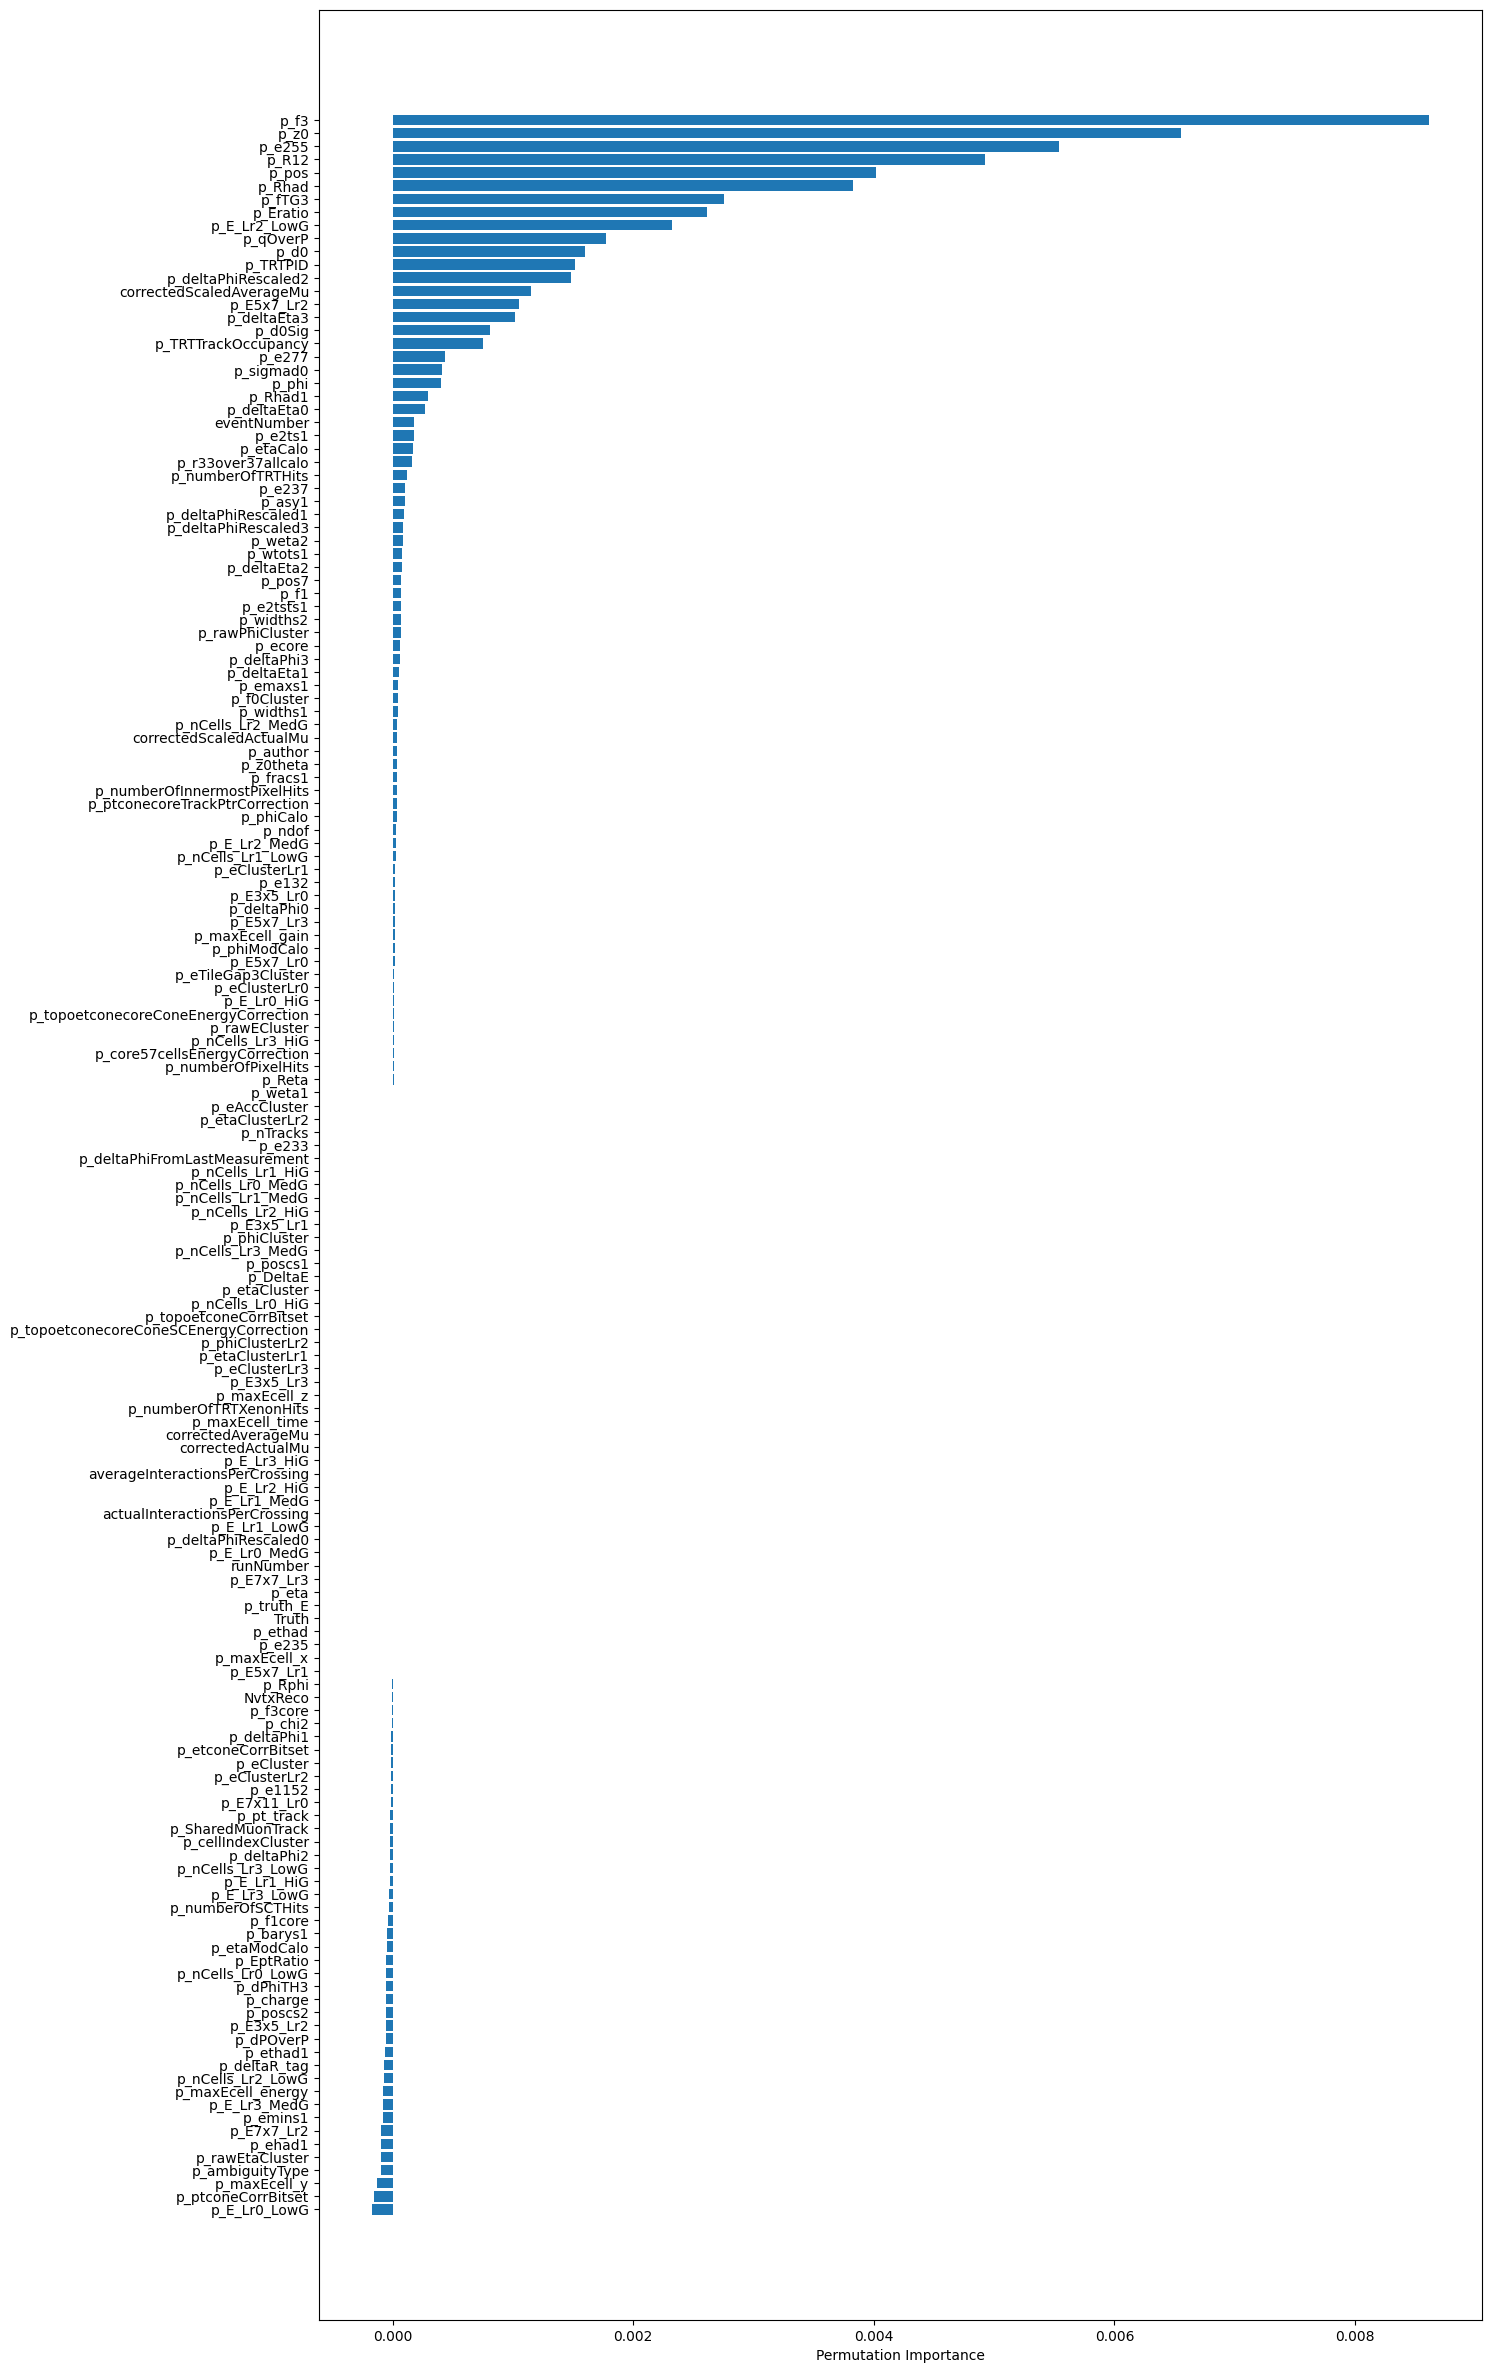

In [39]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(clf_BO, X_test_cut, y_test_cut, n_repeats=10, random_state=0, n_jobs=2)

sorted_idx = perm_importance.importances_mean.argsort()

fig, ax = plt.subplots(1, figsize=(15, 30))
ax.barh(train.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
ax.set_xlabel("Permutation Importance")

In [40]:
print(perm_importance.importances_mean[sorted_idx][-15:])
chosen_variables = train.columns[sorted_idx][-15:]
print(chosen_variables)

[0.00105354 0.00114708 0.00148185 0.00151631 0.00160246 0.00177231
 0.00231877 0.00260923 0.00275446 0.00383015 0.00401969 0.00492554
 0.00554092 0.00655015 0.00861292]
Index(['p_E5x7_Lr2', 'correctedScaledAverageMu', 'p_deltaPhiRescaled2',
       'p_TRTPID', 'p_d0', 'p_qOverP', 'p_E_Lr2_LowG', 'p_Eratio', 'p_fTG3',
       'p_Rhad', 'p_pos', 'p_R12', 'p_e255', 'p_z0', 'p_f3'],
      dtype='object')


In [41]:
X = train[chosen_variables]
y = train['Truth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train_cut = X_train
X_test_cut = X_test
y_train_cut = y_train
y_test_cut = y_test

In [42]:
clf_BO = ltb.LGBMClassifier(max_depth=int(78.0100497973294), random_state=42, min_split_gain=0.11119099022379708, num_leaves=16)

clf_BO.fit(X_train_cut, y_train_cut)

expected_y  = y_test_cut
predicted_y = clf_BO.predict(X_test_cut)

print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

         0.0       0.91      0.79      0.85     10142
         1.0       0.93      0.98      0.95     30483

    accuracy                           0.93     40625
   macro avg       0.92      0.88      0.90     40625
weighted avg       0.93      0.93      0.93     40625

[[ 8051  2091]
 [  758 29725]]


In [43]:
print(f"Train accuracy: {accuracy_score(predicted_y, expected_y)*100.0:.2f}%")

Train accuracy: 92.99%


In [ ]:
def evaluate(bquark) :
    N = [[0,0], [0,0]]   # Make a list of lists (i.e. confusion matrix) for counting successes/failures.
    for i in np.arange(len(isb)):
        if (bquark[i] == 0 and isb[i] == 0) : N[0][0] += 1
        if (bquark[i] == 0 and isb[i] == 1) : N[0][1] += 1
        if (bquark[i] == 1 and isb[i] == 0) : N[1][0] += 1
        if (bquark[i] == 1 and isb[i] == 1) : N[1][1] += 1
    fracWrong = float(N[0][1]+N[1][0])/float(len(isb))
    accuracy = 1.0 - fracWrong
    return N, accuracy, fracWrong

In [ ]:
N, accuracy, fracWrong = evaluate(bquark)
print("\nRESULT OF HUMAN ATTEMPT AT A GOOD SELECTION:")
print("  First number in parenthesis is the estimate, second is the MC truth:")
print("  True-Negative (0,0)  = ", N[0][0])
print("  False-Negative (0,1) = ", N[0][1])
print("  False-Positive (1,0) = ", N[1][0])
print("  True-Positive (1,1)  = ", N[1][1])
print("    Fraction wrong            = ( (0,1) + (1,0) ) / sum = ", fracWrong)
print("    Fraction right (accuracy) = ( (0,0) + (1,1) ) / sum = ", accuracy)